In [ ]:
# Import all necessary libraries for multi-class classification
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.feature_selection import SelectKBest, f_classif, RFE
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (accuracy_score, precision_score, recall_score,
                             f1_score, confusion_matrix, classification_report)
import warnings
warnings.filterwarnings('ignore')

print("✅ All libraries imported successfully!")
print(f"   - pandas version: {pd.__version__}")
print(f"   - numpy version: {np.__version__}")
print(f"   - scikit-learn imported")

✅ All libraries imported successfully!
   - pandas version: 2.2.2
   - numpy version: 2.0.2
   - scikit-learn imported


In [ ]:
# Upload your CSV file in Colab
from google.colab import files
uploaded = files.upload()

# Load the dataset
df = pd.read_csv('network_traffic_multiclass_dataset.csv')

# Display basic info
print("=" * 70)
print("MULTI-CLASS DATASET INFORMATION")
print("=" * 70)
print(f"Total samples: {len(df)}")
print(f"Total features: {len(df.columns) - 1}")

print(f"\n📊 Label distribution:")
label_counts = df['label'].value_counts().sort_index()
for label in label_counts.index:
    label_name = ['Normal', 'vsftpd Backdoor', 'SSH Brute Force'][label]
    print(f"   Label {label} ({label_name:20s}): {label_counts[label]:4d} flows")

print(f"\n📈 Dataset balance:")
balance_pct = (label_counts / len(df) * 100).round(2)
for label in balance_pct.index:
    label_name = ['Normal', 'vsftpd Backdoor', 'SSH Brute Force'][label]
    print(f"   {label_name:20s}: {balance_pct[label]:5.2f}%")

# Check for missing values
print(f"\n🔍 Missing values: {df.isnull().sum().sum()}")
print(f"\n🔍 duplicated values: {df.duplicated().sum().sum()}")
# Display first few rows
print("\n" + "=" * 70)
print("FIRST 5 ROWS:")
print("=" * 70)
df.head()

Saving network_traffic_multiclass_dataset.csv to network_traffic_multiclass_dataset.csv
MULTI-CLASS DATASET INFORMATION
Total samples: 2073
Total features: 35

📊 Label distribution:
   Label 0 (Normal              ):  791 flows
   Label 1 (vsftpd Backdoor     ):  591 flows
   Label 2 (SSH Brute Force     ):  691 flows

📈 Dataset balance:
   Normal              : 38.16%
   vsftpd Backdoor     : 28.51%
   SSH Brute Force     : 33.33%

🔍 Missing values: 0

🔍 duplicated values: 0

FIRST 5 ROWS:


,src_ip,dst_ip,src_port,dst_port,protocol,duration,total_packets,total_bytes,min_packet_size,max_packet_size,...,avg_iat,std_iat,min_iat,max_iat,syn_ack_ratio,is_port_22,is_port_6200,is_ftp_port,is_ftp_data_port,label
0,10.0.2.4,10.0.2.5,44017,22,TCP,2.103768,26,5451,66,1602,...,0.084151,0.385122,9.536743e-07,1.970212,0.080000,1,0,0,0,2
1,192.168.113.129,192.168.113.130,34105,21,TCP,9.837576,19,1331,54,100,...,0.546532,2.243282,0.000000e+00,9.795772,0.142857,0,0,1,0,1
2,10.0.2.4,10.0.2.5,40603,22,TCP,1.887265,26,5451,66,1602,...,0.075491,0.342151,3.004074e-05,1.750835,0.080000,1,0,0,0,2
3,192.168.113.129,192.168.113.130,35668,22,TCP,0.004840,13,3264,66,1602,...,0.000403,0.000673,4.196167e-05,0.002574,0.166667,1,0,0,0,0
4,192.168.113.129,192.168.113.130,41273,21,TCP,9.832887,19,1329,54,100,...,0.546272,2.242975,0.000000e+00,9.794246,0.142857,0,0,1,0,1


In [ ]:
# Dataset info
print("=" * 70)
print("DATASET STRUCTURE")
print("=" * 70)
print(df.info())

print("\n" + "=" * 70)
print("STATISTICAL SUMMARY")
print("=" * 70)
df.describe()

DATASET STRUCTURE
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2073 entries, 0 to 2072
Data columns (total 36 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   src_ip                  2073 non-null   object 
 1   dst_ip                  2073 non-null   object 
 2   src_port                2073 non-null   int64  
 3   dst_port                2073 non-null   int64  
 4   protocol                2073 non-null   object 
 5   duration                2073 non-null   float64
 6   total_packets           2073 non-null   int64  
 7   total_bytes             2073 non-null   int64  
 8   min_packet_size         2073 non-null   int64  
 9   max_packet_size         2073 non-null   int64  
 10  avg_packet_size         2073 non-null   float64
 11  std_packet_size         2073 non-null   float64
 12  syn_count               2073 non-null   int64  
 13  ack_count               2073 non-null   int64  
 14  fin_count             

,src_port,dst_port,duration,total_packets,total_bytes,min_packet_size,max_packet_size,avg_packet_size,std_packet_size,syn_count,...,avg_iat,std_iat,min_iat,max_iat,syn_ack_ratio,is_port_22,is_port_6200,is_ftp_port,is_ftp_data_port,label
count,2073.000000,2073.000000,2073.000000,2073.000000,2073.000000,2073.000000,2073.000000,2073.000000,2073.000000,2073.000000,...,2073.000000,2073.000000,2.073000e+03,2073.000000,2073.000000,2073.000000,2073.000000,2073.000000,2073.0,2073.000000
mean,42670.227689,1195.999518,130.542249,23.253739,3605.076218,64.653642,887.618427,152.864506,202.786377,2.052098,...,3.853059,18.473737,5.329064e-05,121.520897,0.188806,0.523396,0.190063,0.285576,0.0,0.951761
std,7100.515089,2424.628277,584.864891,12.687523,2672.903348,8.246425,748.875456,76.540131,185.653918,0.665030,...,34.757071,88.575626,5.637727e-04,543.555304,0.264945,0.499573,0.392445,0.451798,0.0,0.844348
min,68.000000,21.000000,0.000212,2.000000,134.000000,54.000000,74.000000,67.000000,0.000000,0.000000,...,0.000184,0.000000,0.000000e+00,0.000212,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
25%,37293.000000,21.000000,0.006428,13.000000,1406.000000,66.000000,100.000000,73.894737,11.995151,2.000000,...,0.000330,0.000397,9.536743e-07,0.002152,0.080000,0.000000,0.000000,0.000000,0.0,0.000000
50%,41521.000000,22.000000,1.661962,26.000000,3264.000000,66.000000,1602.000000,209.653846,340.877707,2.000000,...,0.066387,0.301267,7.152557e-06,1.540935,0.080000,1.000000,0.000000,0.000000,0.0,1.000000
75%,46067.000000,22.000000,9.826100,29.000000,5451.000000,66.000000,1602.000000,209.653846,340.877707,2.000000,...,0.545874,1.402988,2.312660e-05,5.207952,0.166667,1.000000,0.000000,1.000000,0.0,2.000000
max,60980.000000,6200.000000,5756.946074,105.000000,21870.000000,342.000000,1602.000000,342.000000,441.261559,8.000000,...,1292.540743,1827.928142,2.430296e-02,5198.257350,1.000000,1.000000,1.000000,1.000000,0.0,2.000000


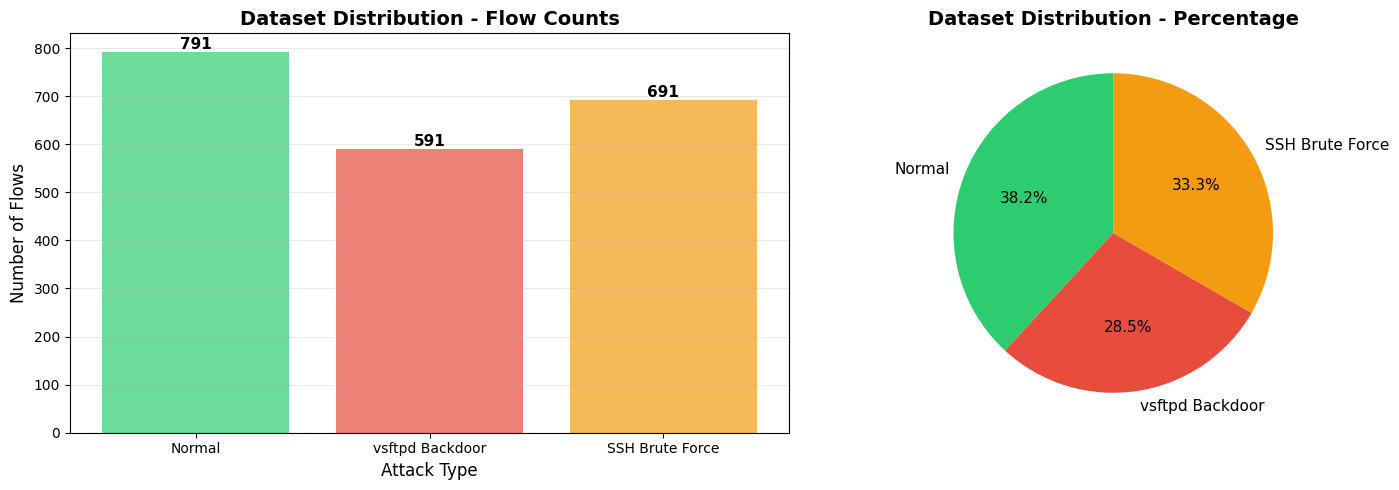


✅ Dataset is well-balanced for multi-class classification!


In [ ]:
# Visualize class distribution
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Bar plot
label_names = ['Normal', 'vsftpd Backdoor', 'SSH Brute Force']
colors = ['#2ecc71', '#e74c3c', '#f39c12']

ax1 = axes[0]
label_counts = df['label'].value_counts().sort_index()
bars = ax1.bar(label_names, label_counts.values, color=colors, alpha=0.7)
ax1.set_xlabel('Attack Type', fontsize=12)
ax1.set_ylabel('Number of Flows', fontsize=12)
ax1.set_title('Dataset Distribution - Flow Counts', fontsize=14, fontweight='bold')
ax1.grid(axis='y', alpha=0.3)

# Add value labels on bars
for bar in bars:
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2., height,
             f'{int(height)}',
             ha='center', va='bottom', fontsize=11, fontweight='bold')

# Pie chart
ax2 = axes[1]
ax2.pie(label_counts.values, labels=label_names, colors=colors,
        autopct='%1.1f%%', startangle=90, textprops={'fontsize': 11})
ax2.set_title('Dataset Distribution - Percentage', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

print("\n✅ Dataset is well-balanced for multi-class classification!")

In [ ]:
print("=" * 70)
print("DATA PREPROCESSING")
print("=" * 70)

# Separate features and labels
X = df.drop(['label'], axis=1)
y = df['label']

print(f"\n✅ Separated features and labels")
print(f"   Features shape: {X.shape}")
print(f"   Labels shape: {y.shape}")

# Identify categorical and numeric features
categorical_cols = ['src_ip', 'dst_ip', 'protocol']
numeric_cols = [col for col in X.columns if col not in categorical_cols]

print(f"\n📋 Feature types:")
print(f"   Categorical features ({len(categorical_cols)}): {categorical_cols}")
print(f"   Numeric features ({len(numeric_cols)}): {len(numeric_cols)}")

# Encode categorical variables
print(f"\n[*] Encoding categorical features...")
le_dict = {}
for col in categorical_cols:
    if col in X.columns:
        le = LabelEncoder()
        X[col] = le.fit_transform(X[col].astype(str))
        le_dict[col] = le
        print(f"   ✅ Encoded {col}: {len(le.classes_)} unique values")

# Handle infinite values
print(f"\n[*] Handling infinite values...")
inf_count_before = np.isinf(X.values).sum()
X = X.replace([np.inf, -np.inf], 0)
inf_count_after = np.isinf(X.values).sum()
print(f"   ✅ Replaced {inf_count_before} infinite values with 0")

# Check for missing values
missing_count = X.isnull().sum().sum()
if missing_count > 0:
    print(f"\n⚠️  Found {missing_count} missing values - filling with 0")
    X = X.fillna(0)
else:
    print(f"\n✅ No missing values found")

print("\n" + "=" * 70)
print("✅ PREPROCESSING COMPLETE!")
print("=" * 70)

DATA PREPROCESSING

✅ Separated features and labels
   Features shape: (2073, 35)
   Labels shape: (2073,)

📋 Feature types:
   Categorical features (3): ['src_ip', 'dst_ip', 'protocol']
   Numeric features (32): 32

[*] Encoding categorical features...
   ✅ Encoded src_ip: 3 unique values
   ✅ Encoded dst_ip: 4 unique values
   ✅ Encoded protocol: 2 unique values

[*] Handling infinite values...
   ✅ Replaced 0 infinite values with 0

✅ No missing values found

✅ PREPROCESSING COMPLETE!


In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2073 entries, 0 to 2072
Data columns (total 35 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   src_ip                  2073 non-null   int64  
 1   dst_ip                  2073 non-null   int64  
 2   src_port                2073 non-null   int64  
 3   dst_port                2073 non-null   int64  
 4   protocol                2073 non-null   int64  
 5   duration                2073 non-null   float64
 6   total_packets           2073 non-null   int64  
 7   total_bytes             2073 non-null   int64  
 8   min_packet_size         2073 non-null   int64  
 9   max_packet_size         2073 non-null   int64  
 10  avg_packet_size         2073 non-null   float64
 11  std_packet_size         2073 non-null   float64
 12  syn_count               2073 non-null   int64  
 13  ack_count               2073 non-null   int64  
 14  fin_count               2073 non-null   

In [ ]:
# Remove features that are too perfect (cause leakage)
print("=" * 60)
print("REMOVING LEAKY FEATURES")
print("=" * 60)

# Check correlation of each feature with label
correlations = X.corrwith(y).abs().sort_values(ascending=False)
print("\nTop 10 features correlated with attack:")
print(correlations.head(10))

# Remove perfect indicators
leaky_features = ['is_port_6200', 'is_ftp_data_port']  # Port 6200 is too obvious!
X_cleaned = X.drop(columns=leaky_features, errors='ignore')

print(f"\n✅ Removed {len(leaky_features)} leaky features")
print(f"   Features: {leaky_features}")
print(f"   Remaining features: {len(X_cleaned.columns)}")

# Use cleaned data for splitting
X = X_cleaned

REMOVING LEAKY FEATURES

Top 10 features correlated with attack:
src_ip                0.874795
dst_ip                0.871303
bytes_per_second      0.761148
packets_per_second    0.561597
backward_bytes        0.534214
total_bytes           0.531310
forward_bytes         0.517339
src_port              0.471353
is_ftp_port           0.466138
is_port_22            0.399704
dtype: float64

✅ Removed 2 leaky features
   Features: ['is_port_6200', 'is_ftp_data_port']
   Remaining features: 33


In [ ]:
print("=" * 70)
print("TRAIN-TEST SPLIT & FEATURE SCALING")
print("=" * 70)

# Split dataset (80% train, 20% test) with stratification
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"\n📊 Training set:")
train_dist = y_train.value_counts().sort_index()
for label in train_dist.index:
    label_name = ['Normal', 'vsftpd', 'SSH BF'][label]
    print(f"   Label {label} ({label_name:12s}): {train_dist[label]:4d} samples")

print(f"\n📊 Test set:")
test_dist = y_test.value_counts().sort_index()
for label in test_dist.index:
    label_name = ['Normal', 'vsftpd', 'SSH BF'][label]
    print(f"   Label {label} ({label_name:12s}): {test_dist[label]:4d} samples")

print(f"\n✅ Total train: {len(X_train)} samples ({len(X_train)/len(X)*100:.1f}%)")
print(f"✅ Total test:  {len(X_test)} samples ({len(X_test)/len(X)*100:.1f}%)")

# Feature Scaling
print(f"\n[*] Scaling features using StandardScaler...")
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(f"✅ Features scaled successfully")
print(f"   Train shape: {X_train_scaled.shape}")
print(f"   Test shape:  {X_test_scaled.shape}")

print("\n" + "=" * 70)
print("✅ DATA SPLIT & SCALING COMPLETE!")
print("=" * 70)

TRAIN-TEST SPLIT & FEATURE SCALING

📊 Training set:
   Label 0 (Normal      ):  632 samples
   Label 1 (vsftpd      ):  473 samples
   Label 2 (SSH BF      ):  553 samples

📊 Test set:
   Label 0 (Normal      ):  159 samples
   Label 1 (vsftpd      ):  118 samples
   Label 2 (SSH BF      ):  138 samples

✅ Total train: 1658 samples (80.0%)
✅ Total test:  415 samples (20.0%)

[*] Scaling features using StandardScaler...
✅ Features scaled successfully
   Train shape: (1658, 33)
   Test shape:  (415, 33)

✅ DATA SPLIT & SCALING COMPLETE!


In [ ]:
# Check for leaky features
print("=" * 60)
print("CHECKING FOR FEATURE LEAKAGE")
print("=" * 60)

# Check correlation with label
correlations = X_train.corrwith(y_train).abs().sort_values(ascending=False)

print("\nTop 10 features correlated with label:")
print(correlations.head(10))

print("\n⚠️ Features with >0.95 correlation (LEAKY):")
leaky = correlations[correlations > 0.95]
if len(leaky) > 0:
    print(leaky)
    print("\n🚨 THESE FEATURES CAUSE OVERFITTING!")
else:
    print("✅ No obvious leaky features found")

# Check if port_6200 feature exists
if 'is_port_6200' in X_train.columns:
    print("\n🚨 WARNING: 'is_port_6200' is still in dataset!")
    print("   This is a PERFECT attack indicator - causes 100% overfitting")
    port_6200_corr = X_train['is_port_6200'].corr(y_train)
    print(f"   Correlation with label: {port_6200_corr:.4f}")

CHECKING FOR FEATURE LEAKAGE

Top 10 features correlated with label:
src_ip                    0.876002
dst_ip                    0.876002
bytes_per_second          0.759784
packets_per_second        0.554226
backward_bytes            0.532994
total_bytes               0.528334
forward_bytes             0.513578
src_port                  0.480889
is_ftp_port               0.457486
forward_backward_ratio    0.399824
dtype: float64

⚠️ Features with >0.95 correlation (LEAKY):
✅ No obvious leaky features found


FEATURE SELECTION - ANOVA F-TEST (Multi-Class)

[*] Selecting top 30 features using ANOVA F-test...

✅ Selected 30 best features using ANOVA:
    1. src_ip                         (F-Score:  306180.23)
    2. dst_ip                         (F-Score:  306180.23)
    3. src_port                       (F-Score:     339.26)
    4. dst_port                       (F-Score:    1190.13)
    5. duration                       (F-Score:      58.78)
    6. total_packets                  (F-Score:     361.16)
    7. total_bytes                    (F-Score:    1866.78)
    8. min_packet_size                (F-Score:      76.70)
    9. max_packet_size                (F-Score:    1400.70)
   10. avg_packet_size                (F-Score:     902.90)
   11. std_packet_size                (F-Score:     835.76)
   12. syn_count                      (F-Score:     176.05)
   13. ack_count                      (F-Score:     432.22)
   14. fin_count                      (F-Score:     262.52)
   15. rst_count  

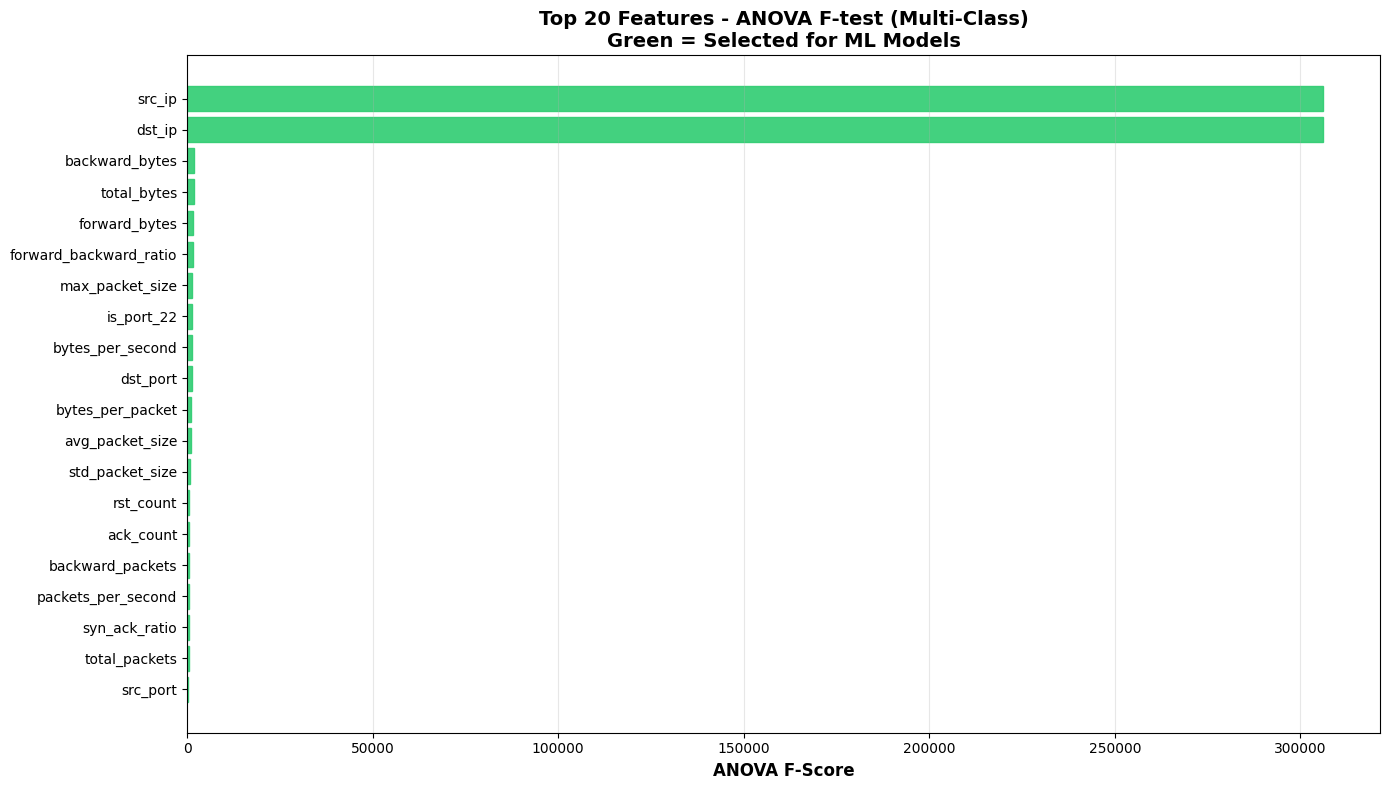


✅ Feature selection complete!
   Original features: 33
   Selected features: 30


In [ ]:
print("=" * 70)
print("FEATURE SELECTION - ANOVA F-TEST (Multi-Class)")
print("=" * 70)

# Select top K features using ANOVA F-test
k_best = 15  # Select top 15 features
print(f"\n[*] Selecting top {k_best} features using ANOVA F-test...")

selector_anova = SelectKBest(score_func=f_classif, k=k_best)
X_train_anova = selector_anova.fit_transform(X_train_scaled, y_train)
X_test_anova = selector_anova.transform(X_test_scaled)

# Get selected feature names
selected_features_anova = X_train.columns[selector_anova.get_support()].tolist()

print(f"\n✅ Selected {k_best} best features using ANOVA:")
for i, feature in enumerate(selected_features_anova, 1):
    feature_idx = X_train.columns.get_loc(feature)
    score = selector_anova.scores_[feature_idx]
    print(f"   {i:2d}. {feature:30s} (F-Score: {score:10.2f})")

# Visualize feature scores
print(f"\n[*] Creating feature importance visualization...")

feature_scores_df = pd.DataFrame({
    'Feature': X_train.columns,
    'F_Score': selector_anova.scores_
}).sort_values('F_Score', ascending=False)

plt.figure(figsize=(14, 8))
top_20 = feature_scores_df.head(20)
bars = plt.barh(range(len(top_20)), top_20['F_Score'], color='steelblue', alpha=0.7)

# Highlight selected features
for i, (idx, row) in enumerate(top_20.iterrows()):
    if row['Feature'] in selected_features_anova:
        bars[i].set_color('#2ecc71')  # Green for selected
        bars[i].set_alpha(0.9)

plt.yticks(range(len(top_20)), top_20['Feature'])
plt.xlabel('ANOVA F-Score', fontsize=12, fontweight='bold')
plt.title(f'Top 20 Features - ANOVA F-test (Multi-Class)\nGreen = Selected for ML Models',
          fontsize=14, fontweight='bold')
plt.gca().invert_yaxis()
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()

print(f"\n✅ Feature selection complete!")
print(f"   Original features: {X_train_scaled.shape[1]}")
print(f"   Selected features: {X_train_anova.shape[1]}")

In [ ]:
print("=" * 70)
print("FEATURE SELECTION - RFE (Recursive Feature Elimination)")
print("=" * 70)

# Use Random Forest as estimator for RFE
print(f"\n[*] Running RFE with Random Forest estimator...")
rf_estimator = RandomForestClassifier(n_estimators=50, max_depth=10, random_state=42)
rfe_selector = RFE(estimator=rf_estimator, n_features_to_select=15, step=1)

X_train_rfe = rfe_selector.fit_transform(X_train_scaled, y_train)
X_test_rfe = rfe_selector.transform(X_test_scaled)

# Get selected feature names
selected_features_rfe = X_train.columns[rfe_selector.get_support()].tolist()

print(f"\n✅ Selected 15 features using RFE:")
for i, feature in enumerate(selected_features_rfe, 1):
    ranking = rfe_selector.ranking_[X_train.columns.get_loc(feature)]
    print(f"   {i:2d}. {feature:30s} (Rank: {ranking})")

print(f"\n✅ RFE feature selection complete!")

FEATURE SELECTION - RFE (Recursive Feature Elimination)

[*] Running RFE with Random Forest estimator...

✅ Selected 15 features using RFE:
    1. src_ip                         (Rank: 1)
    2. dst_ip                         (Rank: 1)
    3. src_port                       (Rank: 1)
    4. dst_port                       (Rank: 1)
    5. protocol                       (Rank: 1)
    6. duration                       (Rank: 1)
    7. total_packets                  (Rank: 1)
    8. total_bytes                    (Rank: 1)
    9. min_packet_size                (Rank: 1)
   10. max_packet_size                (Rank: 1)
   11. avg_packet_size                (Rank: 1)
   12. std_packet_size                (Rank: 1)
   13. syn_count                      (Rank: 1)
   14. ack_count                      (Rank: 1)
   15. fin_count                      (Rank: 1)
   16. psh_count                      (Rank: 1)
   17. urg_count                      (Rank: 1)
   18. packets_per_second             (Rank:

FEATURE SELECTION COMPARISON

📊 ANOVA Selected Features:
    1. src_ip
    2. dst_ip
    3. src_port
    4. dst_port
    5. duration
    6. total_packets
    7. total_bytes
    8. min_packet_size
    9. max_packet_size
   10. avg_packet_size
   11. std_packet_size
   12. syn_count
   13. ack_count
   14. fin_count
   15. rst_count
   16. psh_count
   17. packets_per_second
   18. bytes_per_second
   19. bytes_per_packet
   20. forward_packets
   21. backward_packets
   22. forward_bytes
   23. backward_bytes
   24. forward_backward_ratio
   25. std_iat
   26. min_iat
   27. max_iat
   28. syn_ack_ratio
   29. is_port_22
   30. is_ftp_port

📊 RFE Selected Features:
    1. src_ip
    2. dst_ip
    3. src_port
    4. dst_port
    5. protocol
    6. duration
    7. total_packets
    8. total_bytes
    9. min_packet_size
   10. max_packet_size
   11. avg_packet_size
   12. std_packet_size
   13. syn_count
   14. ack_count
   15. fin_count
   16. psh_count
   17. urg_count
   18. packets_per

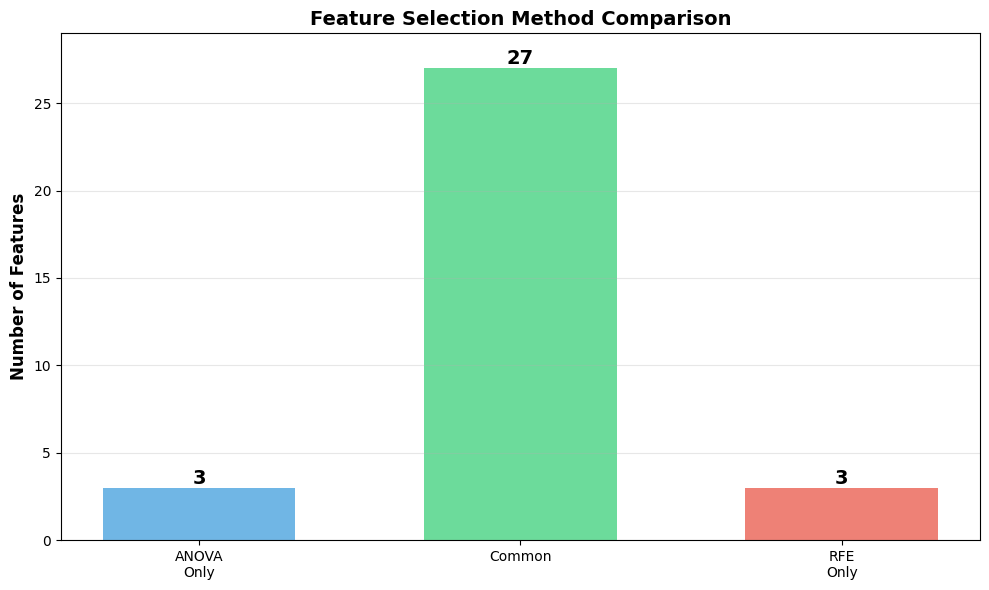


✅ Using ANOVA-selected 30 features for ML models

✅ FEATURE SELECTION COMPLETE!


In [ ]:
print("=" * 70)
print("FEATURE SELECTION COMPARISON")
print("=" * 70)

print("\n📊 ANOVA Selected Features:")
for i, f in enumerate(selected_features_anova, 1):
    print(f"   {i:2d}. {f}")

print("\n📊 RFE Selected Features:")
for i, f in enumerate(selected_features_rfe, 1):
    print(f"   {i:2d}. {f}")

# Find common features
common_features = set(selected_features_anova) & set(selected_features_rfe)
print(f"\n🔄 Common features ({len(common_features)}):")
for i, f in enumerate(sorted(common_features), 1):
    print(f"   {i:2d}. {f}")

# Features unique to each method
anova_only = set(selected_features_anova) - set(selected_features_rfe)
rfe_only = set(selected_features_rfe) - set(selected_features_anova)

print(f"\n📍 ANOVA only ({len(anova_only)}): {sorted(anova_only)}")
print(f"📍 RFE only ({len(rfe_only)}): {sorted(rfe_only)}")

# Visualize comparison
fig, ax = plt.subplots(figsize=(10, 6))

categories = ['ANOVA\nOnly', 'Common', 'RFE\nOnly']
counts = [len(anova_only), len(common_features), len(rfe_only)]
colors_bar = ['#3498db', '#2ecc71', '#e74c3c']

bars = ax.bar(categories, counts, color=colors_bar, alpha=0.7, width=0.6)

for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height,
            f'{int(height)}',
            ha='center', va='bottom', fontsize=14, fontweight='bold')

ax.set_ylabel('Number of Features', fontsize=12, fontweight='bold')
ax.set_title('Feature Selection Method Comparison', fontsize=14, fontweight='bold')
ax.set_ylim([0, max(counts) + 2])
ax.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

# For ML models, we'll use ANOVA-selected features
X_train_final = X_train_anova
X_test_final = X_test_anova
selected_features_final = selected_features_anova

print(f"\n✅ Using ANOVA-selected {len(selected_features_final)} features for ML models")
print("\n" + "=" * 70)
print("✅ FEATURE SELECTION COMPLETE!")
print("=" * 70)

In [ ]:
print("=" * 70)
print("TRAINING MULTI-CLASS ML MODELS")
print("=" * 70)

# Dictionary to store models with regularization
models = {
    'Random Forest': RandomForestClassifier(
        n_estimators=100,
        max_depth=15,
        min_samples_split=5,
        min_samples_leaf=2,
        random_state=42
    ),
    'SVM': SVC(
        kernel='rbf',
        C=1.0,
        gamma='scale',
        random_state=42
    ),
    'Decision Tree': DecisionTreeClassifier(
        max_depth=10,
        min_samples_split=5,
        min_samples_leaf=2,
        random_state=42
    ),
    'Naive Bayes': GaussianNB(),
    'Logistic Regression': LogisticRegression(
        multi_class='multinomial',  # Important for multi-class!
        solver='lbfgs',
        C=1.0,
        max_iter=1000,
        random_state=42
    )
}

# Dictionary to store results
results = {}

print(f"\n[*] Training {len(models)} models on multi-class data...")
print(f"[*] Classes: 0=Normal, 1=vsftpd Backdoor, 2=SSH Brute Force")

# Train each model
for name, model in models.items():
    print(f"\n{'='*70}")
    print(f"[*] Training {name}...")
    print(f"{'='*70}")

    # Train on full training set
    model.fit(X_train_final, y_train)

    # Predictions on train and test sets
    y_train_pred = model.predict(X_train_final)
    y_test_pred = model.predict(X_test_final)

    # Calculate metrics for multi-class
    train_accuracy = accuracy_score(y_train, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)

    # Multi-class metrics (weighted average)
    precision = precision_score(y_test, y_test_pred, average='weighted')
    recall = recall_score(y_test, y_test_pred, average='weighted')
    f1 = f1_score(y_test, y_test_pred, average='weighted')

    # Per-class metrics
    precision_per_class = precision_score(y_test, y_test_pred, average=None)
    recall_per_class = recall_score(y_test, y_test_pred, average=None)
    f1_per_class = f1_score(y_test, y_test_pred, average=None)

    results[name] = {
        'model': model,
        'train_predictions': y_train_pred,
        'test_predictions': y_test_pred,
        'train_accuracy': train_accuracy,
        'test_accuracy': test_accuracy,
        'accuracy': test_accuracy,
        'precision': precision,
        'recall': recall,
        'f1_score': f1,
        'precision_per_class': precision_per_class,
        'recall_per_class': recall_per_class,
        'f1_per_class': f1_per_class,
        'overfitting': train_accuracy - test_accuracy
    }

    print(f"✅ {name} trained successfully!")
    print(f"   Train Accuracy: {train_accuracy:.4f}")
    print(f"   Test Accuracy:  {test_accuracy:.4f}")
    print(f"   Precision (weighted): {precision:.4f}")
    print(f"   Recall (weighted):    {recall:.4f}")
    print(f"   F1-Score (weighted):  {f1:.4f}")
    print(f"   Overfitting Gap: {train_accuracy - test_accuracy:.4f}")

print("\n" + "=" * 70)
print("✅ ALL MODELS TRAINED SUCCESSFULLY!")
print("=" * 70)

TRAINING MULTI-CLASS ML MODELS

[*] Training 5 models on multi-class data...
[*] Classes: 0=Normal, 1=vsftpd Backdoor, 2=SSH Brute Force

[*] Training Random Forest...
✅ Random Forest trained successfully!
   Train Accuracy: 1.0000
   Test Accuracy:  0.9976
   Precision (weighted): 0.9976
   Recall (weighted):    0.9976
   F1-Score (weighted):  0.9976
   Overfitting Gap: 0.0024

[*] Training SVM...
✅ SVM trained successfully!
   Train Accuracy: 1.0000
   Test Accuracy:  1.0000
   Precision (weighted): 1.0000
   Recall (weighted):    1.0000
   F1-Score (weighted):  1.0000
   Overfitting Gap: 0.0000

[*] Training Decision Tree...
✅ Decision Tree trained successfully!
   Train Accuracy: 0.9994
   Test Accuracy:  0.9976
   Precision (weighted): 0.9976
   Recall (weighted):    0.9976
   F1-Score (weighted):  0.9976
   Overfitting Gap: 0.0018

[*] Training Naive Bayes...
✅ Naive Bayes trained successfully!
   Train Accuracy: 0.9994
   Test Accuracy:  1.0000
   Precision (weighted): 1.0000
  

In [ ]:
print("=" * 80)
print("MULTI-CLASS MODEL EVALUATION - OVERALL METRICS")
print("=" * 80)

# Create results DataFrame
results_df = pd.DataFrame({
    'Model': list(results.keys()),
    'Train Accuracy': [results[m]['train_accuracy'] for m in results.keys()],
    'Test Accuracy': [results[m]['test_accuracy'] for m in results.keys()],
    'Precision': [results[m]['precision'] for m in results.keys()],
    'Recall': [results[m]['recall'] for m in results.keys()],
    'F1-Score': [results[m]['f1_score'] for m in results.keys()],
    'Overfitting Gap': [results[m]['overfitting'] for m in results.keys()]
})

# Sort by F1-Score
results_df = results_df.sort_values('F1-Score', ascending=False)

print("\n📊 PERFORMANCE METRICS (Weighted Average):")
print(results_df.to_string(index=False))

# Find best model
best_model_name = results_df.iloc[0]['Model']
best_f1 = results_df.iloc[0]['F1-Score']
best_acc = results_df.iloc[0]['Test Accuracy']

print(f"\n🏆 BEST MODEL: {best_model_name}")
print(f"   Test Accuracy: {best_acc:.4f}")
print(f"   F1-Score: {best_f1:.4f}")

# Check overfitting
print(f"\n⚠️  Overfitting Analysis:")
for _, row in results_df.iterrows():
    gap = row['Overfitting Gap']
    status = "✅ Good" if gap < 0.05 else "⚠️ Slight" if gap < 0.10 else "🚨 High"
    print(f"   {row['Model']:20s}: Gap = {gap:.4f} {status}")

MULTI-CLASS MODEL EVALUATION - OVERALL METRICS

📊 PERFORMANCE METRICS (Weighted Average):
              Model  Train Accuracy  Test Accuracy  Precision  Recall  F1-Score  Overfitting Gap
                SVM        1.000000        1.00000   1.000000 1.00000  1.000000         0.000000
Logistic Regression        1.000000        1.00000   1.000000 1.00000  1.000000         0.000000
        Naive Bayes        1.000000        1.00000   1.000000 1.00000  1.000000         0.000000
      Random Forest        0.999397        0.99759   0.997605 0.99759  0.997589         0.001807
      Decision Tree        0.999397        0.99759   0.997605 0.99759  0.997589         0.001807

🏆 BEST MODEL: SVM
   Test Accuracy: 1.0000
   F1-Score: 1.0000

⚠️  Overfitting Analysis:
   SVM                 : Gap = 0.0000 ✅ Good
   Logistic Regression : Gap = 0.0000 ✅ Good
   Naive Bayes         : Gap = 0.0000 ✅ Good
   Random Forest       : Gap = 0.0018 ✅ Good
   Decision Tree       : Gap = 0.0018 ✅ Good


In [ ]:
print("=" * 80)
print("PER-CLASS PERFORMANCE ANALYSIS")
print("=" * 80)

class_names = ['Normal', 'vsftpd Backdoor', 'SSH Brute Force']

for model_name, result in results.items():
    print(f"\n{'='*80}")
    print(f"📊 {model_name} - Per-Class Metrics")
    print(f"{'='*80}")

    per_class_df = pd.DataFrame({
        'Class': class_names,
        'Precision': result['precision_per_class'],
        'Recall': result['recall_per_class'],
        'F1-Score': result['f1_per_class']
    })

    print(per_class_df.to_string(index=False))
    print()

# Create comprehensive per-class comparison
print("\n" + "=" * 80)
print("PER-CLASS F1-SCORE COMPARISON (All Models)")
print("=" * 80)

comparison_data = []
for model_name, result in results.items():
    for i, class_name in enumerate(class_names):
        comparison_data.append({
            'Model': model_name,
            'Class': class_name,
            'F1-Score': result['f1_per_class'][i]
        })

comparison_df = pd.DataFrame(comparison_data)

# Pivot for better view
pivot_df = comparison_df.pivot(index='Model', columns='Class', values='F1-Score')
print(pivot_df.to_string())

PER-CLASS PERFORMANCE ANALYSIS

📊 Random Forest - Per-Class Metrics
          Class  Precision   Recall  F1-Score
         Normal    0.99375 1.000000  0.996865
vsftpd Backdoor    1.00000 0.991525  0.995745
SSH Brute Force    1.00000 1.000000  1.000000


📊 SVM - Per-Class Metrics
          Class  Precision  Recall  F1-Score
         Normal        1.0     1.0       1.0
vsftpd Backdoor        1.0     1.0       1.0
SSH Brute Force        1.0     1.0       1.0


📊 Decision Tree - Per-Class Metrics
          Class  Precision   Recall  F1-Score
         Normal    0.99375 1.000000  0.996865
vsftpd Backdoor    1.00000 0.991525  0.995745
SSH Brute Force    1.00000 1.000000  1.000000


📊 Naive Bayes - Per-Class Metrics
          Class  Precision  Recall  F1-Score
         Normal        1.0     1.0       1.0
vsftpd Backdoor        1.0     1.0       1.0
SSH Brute Force        1.0     1.0       1.0


📊 Logistic Regression - Per-Class Metrics
          Class  Precision  Recall  F1-Score
         Norm

VISUALIZING MODEL PERFORMANCE


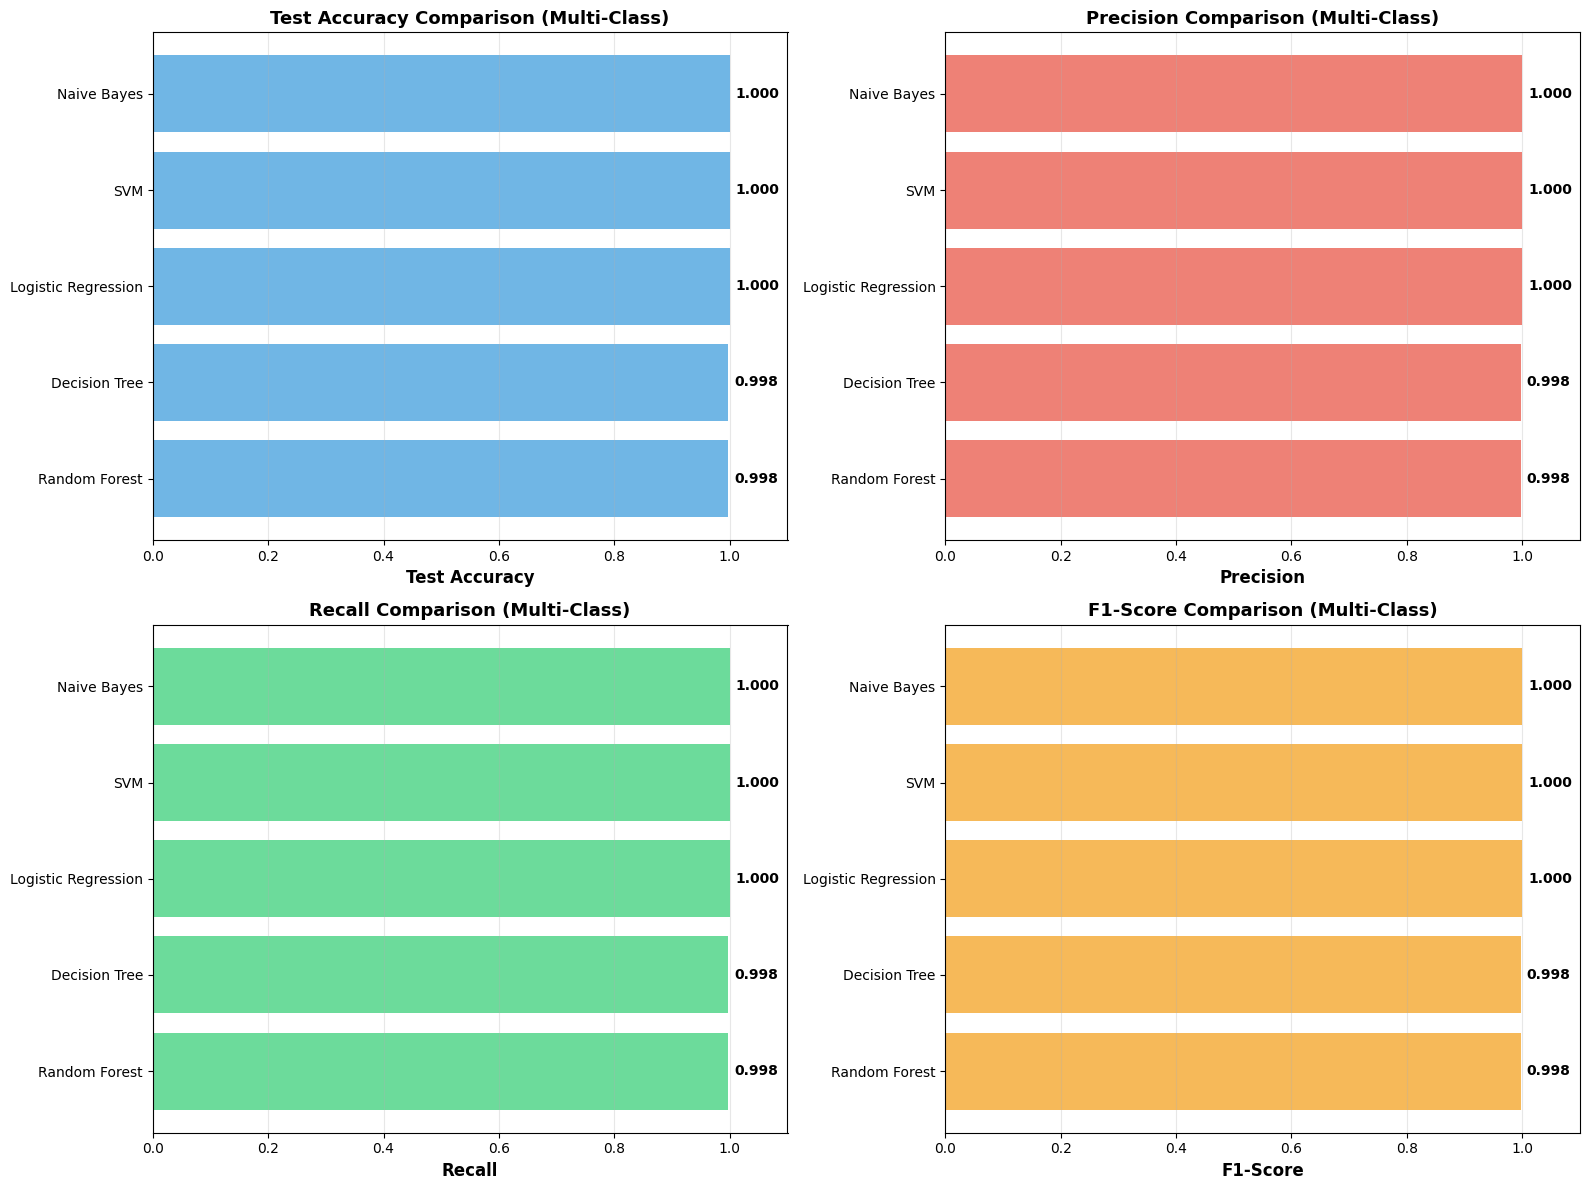

✅ Model comparison visualization complete!


In [ ]:
print("=" * 70)
print("VISUALIZING MODEL PERFORMANCE")
print("=" * 70)

# Create comprehensive visualization
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

metrics = ['Test Accuracy', 'Precision', 'Recall', 'F1-Score']
colors_metrics = ['#3498db', '#e74c3c', '#2ecc71', '#f39c12']

for idx, (ax, metric, color) in enumerate(zip(axes.flat, metrics, colors_metrics)):
    sorted_data = results_df.sort_values(metric, ascending=True)
    bars = ax.barh(sorted_data['Model'], sorted_data[metric], color=color, alpha=0.7)

    ax.set_xlabel(metric, fontsize=12, fontweight='bold')
    ax.set_title(f'{metric} Comparison (Multi-Class)', fontsize=13, fontweight='bold')
    ax.set_xlim([0, 1.1])
    ax.grid(axis='x', alpha=0.3)

    # Add value labels
    for i, (bar, v) in enumerate(zip(bars, sorted_data[metric])):
        ax.text(v + 0.01, i, f'{v:.3f}', va='center', fontsize=10, fontweight='bold')

plt.tight_layout()
plt.show()

print("✅ Model comparison visualization complete!")

OVERFITTING ANALYSIS - TRAIN VS TEST ACCURACY


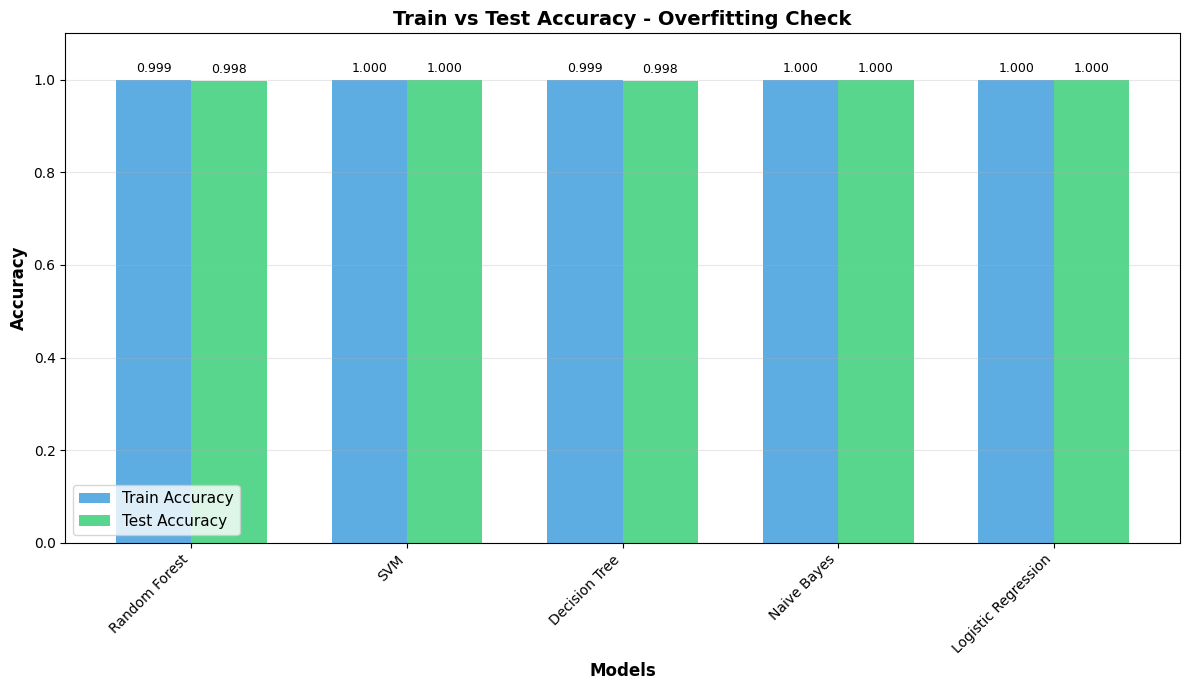


📊 Overfitting Summary:
   Gap < 0.05:  Excellent generalization ✅
   Gap 0.05-0.10: Good generalization ⚠️
   Gap > 0.10: Overfitting detected 🚨

   Random Forest       : 0.0018 ✅
   SVM                 : 0.0000 ✅
   Decision Tree       : 0.0018 ✅
   Naive Bayes         : 0.0000 ✅
   Logistic Regression : 0.0000 ✅


In [ ]:
print("=" * 70)
print("OVERFITTING ANALYSIS - TRAIN VS TEST ACCURACY")
print("=" * 70)

# Visualize train vs test accuracy
fig, ax = plt.subplots(figsize=(12, 7))

x = np.arange(len(results))
width = 0.35

train_accs = [results[m]['train_accuracy'] for m in results.keys()]
test_accs = [results[m]['test_accuracy'] for m in results.keys()]

bars1 = ax.bar(x - width/2, train_accs, width, label='Train Accuracy',
               color='#3498db', alpha=0.8)
bars2 = ax.bar(x + width/2, test_accs, width, label='Test Accuracy',
               color='#2ecc71', alpha=0.8)

ax.set_xlabel('Models', fontsize=12, fontweight='bold')
ax.set_ylabel('Accuracy', fontsize=12, fontweight='bold')
ax.set_title('Train vs Test Accuracy - Overfitting Check', fontsize=14, fontweight='bold')
ax.set_xticks(x)
ax.set_xticklabels(results.keys(), rotation=45, ha='right')
ax.legend(fontsize=11)
ax.set_ylim([0, 1.1])
ax.grid(axis='y', alpha=0.3)

# Add value labels
for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height + 0.01,
                f'{height:.3f}',
                ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()

# Print overfitting summary
print("\n📊 Overfitting Summary:")
print("   Gap < 0.05:  Excellent generalization ✅")
print("   Gap 0.05-0.10: Good generalization ⚠️")
print("   Gap > 0.10: Overfitting detected 🚨")
print()

for model_name in results.keys():
    gap = results[model_name]['overfitting']
    status = "✅" if gap < 0.05 else "⚠️" if gap < 0.10 else "🚨"
    print(f"   {model_name:20s}: {gap:.4f} {status}")

CONFUSION MATRICES - MULTI-CLASS


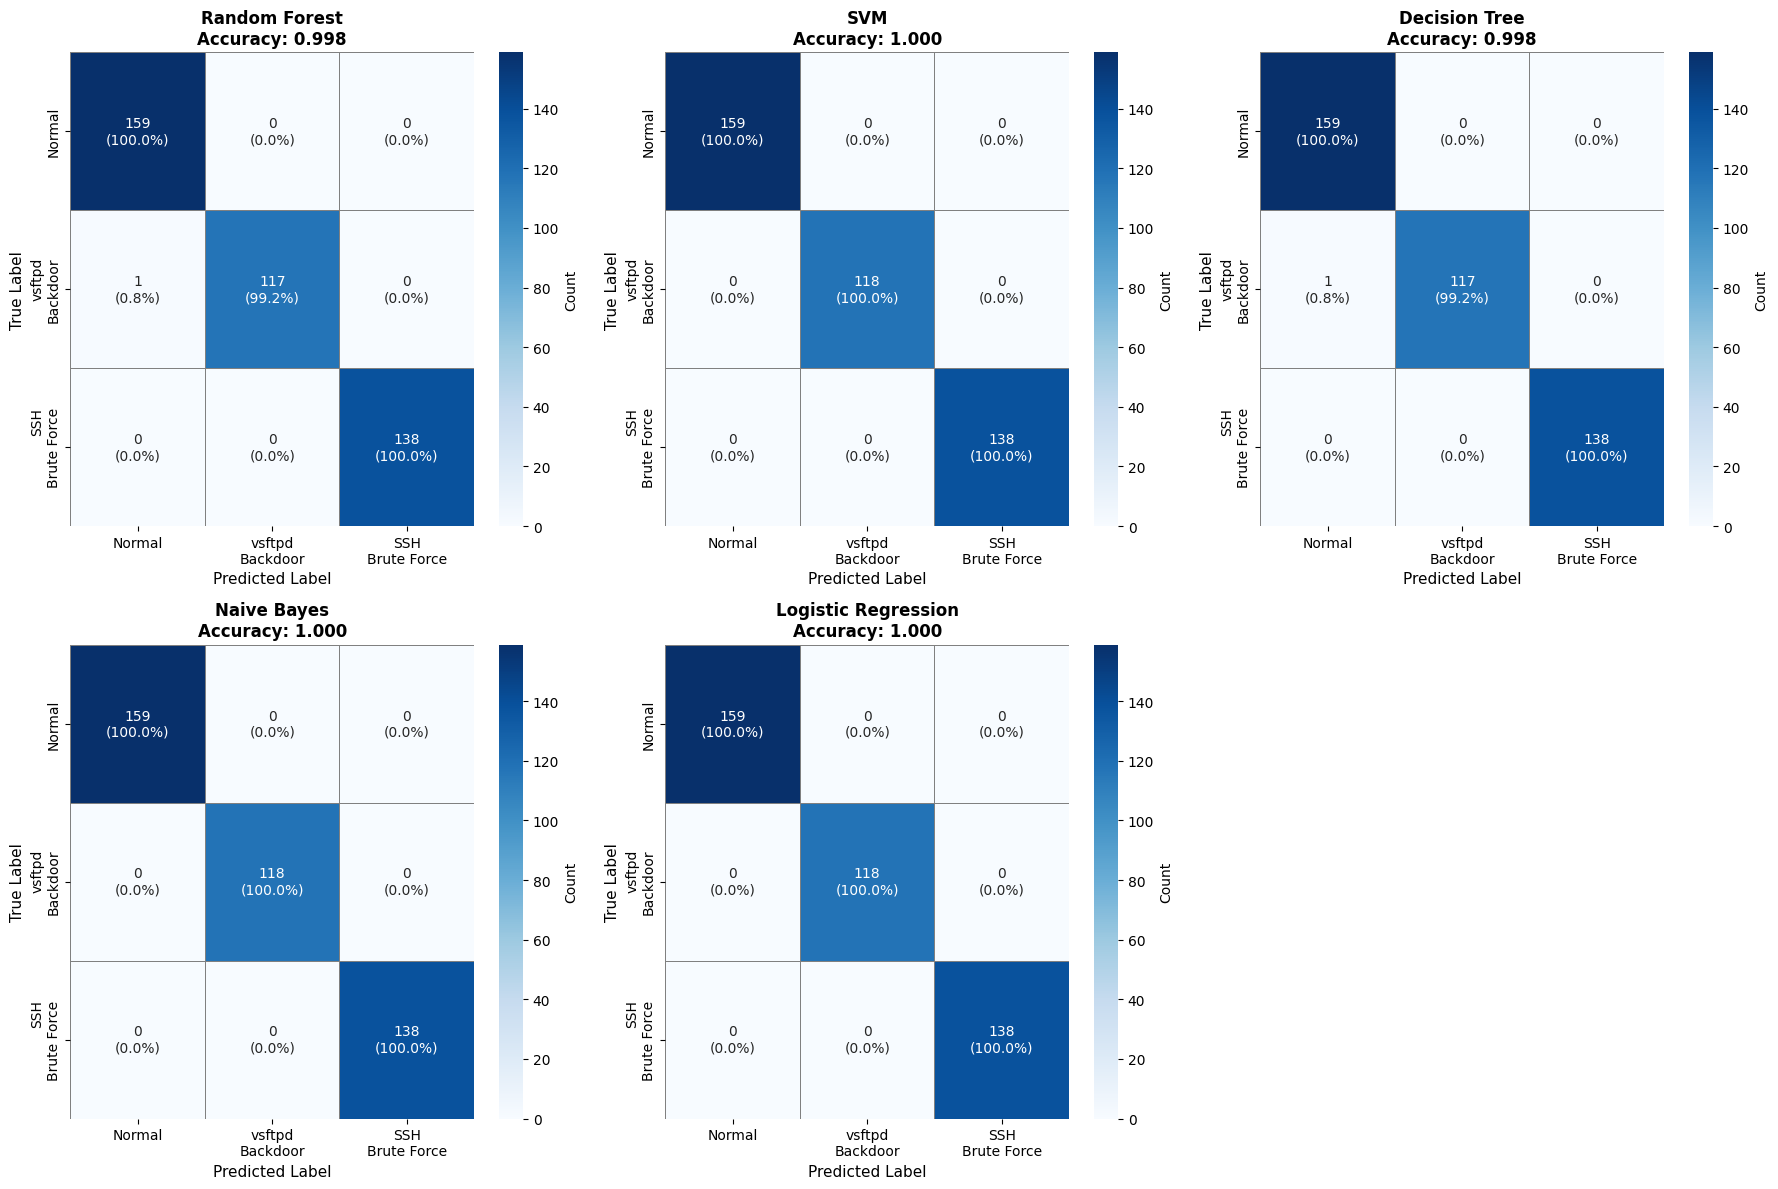

✅ Confusion matrices visualization complete!


In [ ]:
print("=" * 70)
print("CONFUSION MATRICES - MULTI-CLASS")
print("=" * 70)

# Plot confusion matrices for all models
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes = axes.ravel()

class_names = ['Normal', 'vsftpd\nBackdoor', 'SSH\nBrute Force']

for idx, (name, result) in enumerate(results.items()):
    cm = confusion_matrix(y_test, result['test_predictions'])

    # Calculate percentages
    cm_percent = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] * 100

    # Create annotations with both count and percentage
    annot = np.empty_like(cm, dtype=object)
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            annot[i, j] = f'{cm[i, j]}\n({cm_percent[i, j]:.1f}%)'

    # Plot heatmap
    sns.heatmap(cm, annot=annot, fmt='', cmap='Blues', ax=axes[idx],
                xticklabels=class_names,
                yticklabels=class_names,
                cbar_kws={'label': 'Count'},
                linewidths=0.5,
                linecolor='gray')

    acc = result['test_accuracy']
    axes[idx].set_title(f'{name}\nAccuracy: {acc:.3f}',
                        fontsize=12, fontweight='bold')
    axes[idx].set_ylabel('True Label', fontsize=11)
    axes[idx].set_xlabel('Predicted Label', fontsize=11)

# Hide extra subplot
axes[-1].axis('off')

plt.tight_layout()
plt.show()

print("✅ Confusion matrices visualization complete!")

In [ ]:
print("=" * 80)
print(f"DETAILED CLASSIFICATION REPORT - {best_model_name}")
print("=" * 80)

# Get best model predictions
best_model = results[best_model_name]['model']
best_predictions = results[best_model_name]['test_predictions']

# Full classification report
class_names_full = ['Normal', 'vsftpd Backdoor', 'SSH Brute Force']
print("\n" + classification_report(y_test, best_predictions,
                                    target_names=class_names_full,
                                    digits=4))

# Confusion Matrix for best model
print(f"\n{'='*80}")
print("CONFUSION MATRIX - BEST MODEL")
print(f"{'='*80}")

cm = confusion_matrix(y_test, best_predictions)
cm_df = pd.DataFrame(cm,
                     index=['Actual: Normal', 'Actual: vsftpd', 'Actual: SSH BF'],
                     columns=['Pred: Normal', 'Pred: vsftpd', 'Pred: SSH BF'])

print("\n", cm_df)

# Calculate per-class accuracy
print(f"\n{'='*80}")
print("PER-CLASS ACCURACY")
print(f"{'='*80}")

for i, class_name in enumerate(class_names_full):
    class_correct = cm[i, i]
    class_total = cm[i, :].sum()
    class_acc = class_correct / class_total if class_total > 0 else 0
    print(f"   {class_name:20s}: {class_acc:.4f} ({class_correct}/{class_total})")

# Misclassification analysis
print(f"\n{'='*80}")
print("MISCLASSIFICATION ANALYSIS")
print(f"{'='*80}")

total_misclassified = len(y_test) - np.trace(cm)
print(f"\nTotal misclassified: {total_misclassified} / {len(y_test)} ({total_misclassified/len(y_test)*100:.2f}%)")

if total_misclassified > 0:
    print("\nMisclassification breakdown:")
    for i in range(len(class_names_full)):
        for j in range(len(class_names_full)):
            if i != j and cm[i, j] > 0:
                print(f"   {class_names_full[i]} → {class_names_full[j]}: {cm[i, j]} samples")
else:
    print("\n🎉 PERFECT CLASSIFICATION - No misclassifications!")

DETAILED CLASSIFICATION REPORT - SVM

                 precision    recall  f1-score   support

         Normal     1.0000    1.0000    1.0000       159
vsftpd Backdoor     1.0000    1.0000    1.0000       118
SSH Brute Force     1.0000    1.0000    1.0000       138

       accuracy                         1.0000       415
      macro avg     1.0000    1.0000    1.0000       415
   weighted avg     1.0000    1.0000    1.0000       415


CONFUSION MATRIX - BEST MODEL

                 Pred: Normal  Pred: vsftpd  Pred: SSH BF
Actual: Normal           159             0             0
Actual: vsftpd             0           118             0
Actual: SSH BF             0             0           138

PER-CLASS ACCURACY
   Normal              : 1.0000 (159/159)
   vsftpd Backdoor     : 1.0000 (118/118)
   SSH Brute Force     : 1.0000 (138/138)

MISCLASSIFICATION ANALYSIS

Total misclassified: 0 / 415 (0.00%)

🎉 PERFECT CLASSIFICATION - No misclassifications!


FEATURE IMPORTANCE ANALYSIS - RANDOM FOREST

📊 Feature Importance Ranking:
               Feature  Importance
        backward_bytes    0.147214
                dst_ip    0.136550
           total_bytes    0.109219
       std_packet_size    0.097424
      bytes_per_packet    0.083956
                src_ip    0.081501
       max_packet_size    0.078704
       avg_packet_size    0.076457
         forward_bytes    0.075444
forward_backward_ratio    0.057845
      bytes_per_second    0.024006
             ack_count    0.010449
            is_port_22    0.009100
              dst_port    0.006882
             rst_count    0.005250


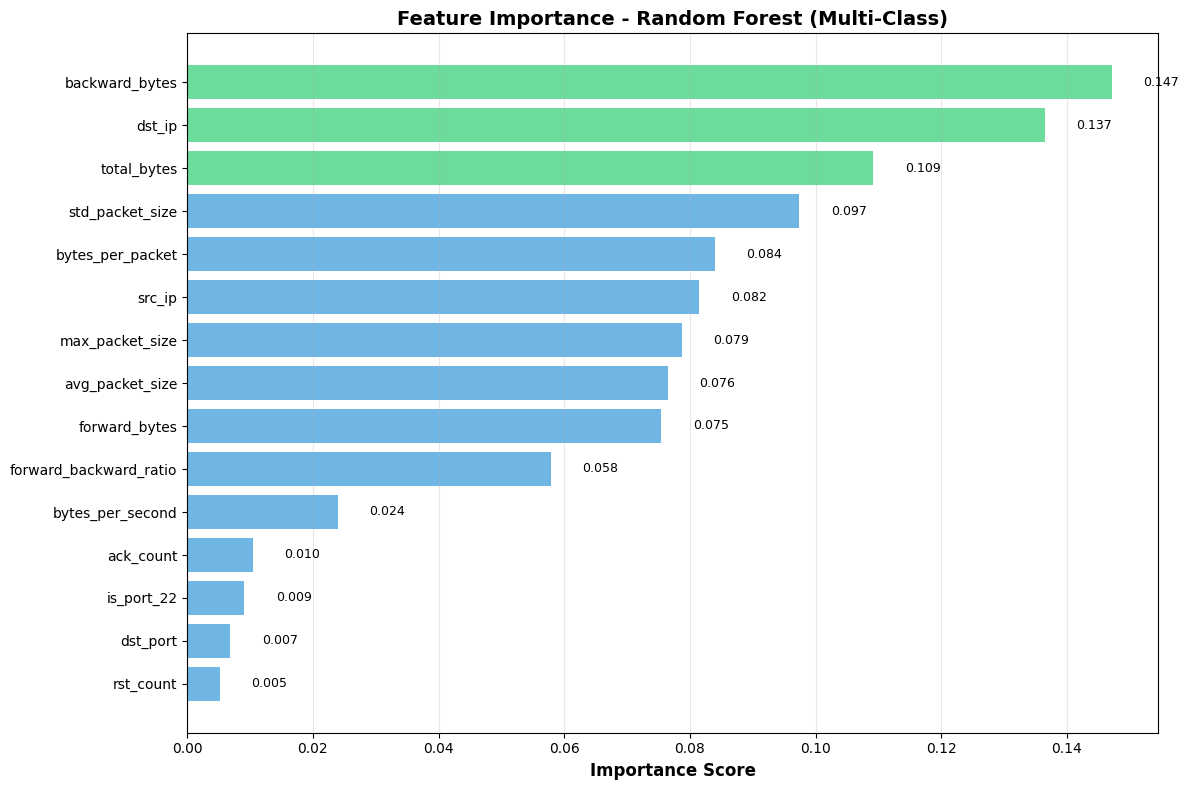


✅ Feature importance analysis complete!


In [ ]:
print("=" * 70)
print("FEATURE IMPORTANCE ANALYSIS - RANDOM FOREST")
print("=" * 70)

if 'Random Forest' in results:
    rf_model = results['Random Forest']['model']

    # Get feature importance
    feature_importance = pd.DataFrame({
        'Feature': selected_features_final,
        'Importance': rf_model.feature_importances_
    }).sort_values('Importance', ascending=False)

    print("\n📊 Feature Importance Ranking:")
    print(feature_importance.to_string(index=False))

    # Visualize
    plt.figure(figsize=(12, 8))
    colors_bars = ['#2ecc71' if imp > 0.1 else '#3498db' for imp in feature_importance['Importance']]
    bars = plt.barh(range(len(feature_importance)), feature_importance['Importance'],
                    color=colors_bars, alpha=0.7)

    plt.yticks(range(len(feature_importance)), feature_importance['Feature'])
    plt.xlabel('Importance Score', fontsize=12, fontweight='bold')
    plt.title('Feature Importance - Random Forest (Multi-Class)',
              fontsize=14, fontweight='bold')
    plt.gca().invert_yaxis()
    plt.grid(axis='x', alpha=0.3)

    # Add value labels
    for i, (bar, imp) in enumerate(zip(bars, feature_importance['Importance'])):
        plt.text(imp + 0.005, i, f'{imp:.3f}', va='center', fontsize=9)

    plt.tight_layout()
    plt.show()

    print("\n✅ Feature importance analysis complete!")
else:
    print("⚠️ Random Forest model not found in results")

PER-CLASS F1-SCORE HEATMAP


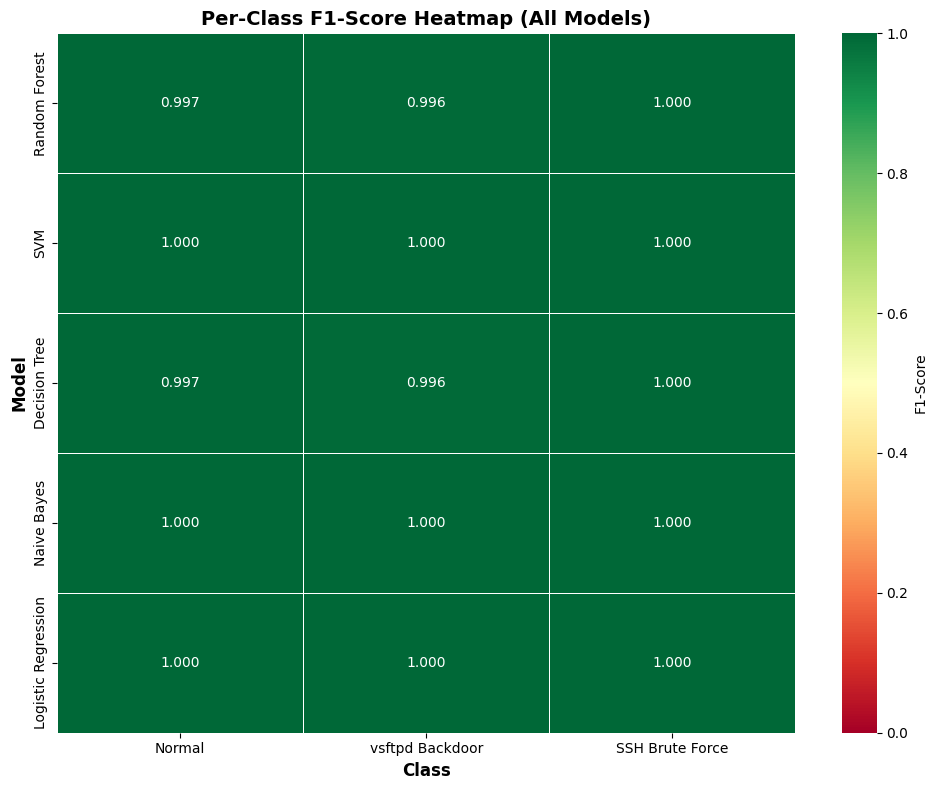

✅ Per-class F1-score heatmap complete!


In [ ]:
print("=" * 70)
print("PER-CLASS F1-SCORE HEATMAP")
print("=" * 70)

# Create matrix of F1-scores
f1_matrix = []
model_names_list = list(results.keys())
class_names_list = ['Normal', 'vsftpd Backdoor', 'SSH Brute Force']

for model_name in model_names_list:
    f1_matrix.append(results[model_name]['f1_per_class'])

f1_matrix = np.array(f1_matrix)

# Create heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(f1_matrix, annot=True, fmt='.3f', cmap='RdYlGn',
            xticklabels=class_names_list,
            yticklabels=model_names_list,
            vmin=0, vmax=1,
            cbar_kws={'label': 'F1-Score'},
            linewidths=0.5)

plt.title('Per-Class F1-Score Heatmap (All Models)',
          fontsize=14, fontweight='bold')
plt.xlabel('Class', fontsize=12, fontweight='bold')
plt.ylabel('Model', fontsize=12, fontweight='bold')
plt.tight_layout()
plt.show()

print("✅ Per-class F1-score heatmap complete!")

In [ ]:
print("=" * 80)
print("COMPREHENSIVE MODEL PERFORMANCE SUMMARY")
print("=" * 80)

# Create comprehensive summary
summary_data = []

for model_name in results.keys():
    result = results[model_name]

    # Overall metrics
    row = {
        'Model': model_name,
        'Test Accuracy': f"{result['test_accuracy']:.4f}",
        'Precision (Weighted)': f"{result['precision']:.4f}",
        'Recall (Weighted)': f"{result['recall']:.4f}",
        'F1-Score (Weighted)': f"{result['f1_score']:.4f}",
        'Overfitting Gap': f"{result['overfitting']:.4f}"
    }

    # Add per-class F1-scores
    for i, class_name in enumerate(['Normal', 'vsftpd', 'SSH BF']):
        row[f'F1 ({class_name})'] = f"{result['f1_per_class'][i]:.4f}"

    summary_data.append(row)

summary_df = pd.DataFrame(summary_data)
print("\n", summary_df.to_string(index=False))

print("\n" + "=" * 80)
print("✅ MODEL EVALUATION COMPLETE!")
print("=" * 80)

COMPREHENSIVE MODEL PERFORMANCE SUMMARY

               Model Test Accuracy Precision (Weighted) Recall (Weighted) F1-Score (Weighted) Overfitting Gap F1 (Normal) F1 (vsftpd) F1 (SSH BF)
      Random Forest        0.9976               0.9976            0.9976              0.9976          0.0018      0.9969      0.9957      1.0000
                SVM        1.0000               1.0000            1.0000              1.0000          0.0000      1.0000      1.0000      1.0000
      Decision Tree        0.9976               0.9976            0.9976              0.9976          0.0018      0.9969      0.9957      1.0000
        Naive Bayes        1.0000               1.0000            1.0000              1.0000          0.0000      1.0000      1.0000      1.0000
Logistic Regression        1.0000               1.0000            1.0000              1.0000          0.0000      1.0000      1.0000      1.0000

✅ MODEL EVALUATION COMPLETE!
